In [48]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [135]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [136]:
global_model = GlobalDistribution.load(model_path)

In [137]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

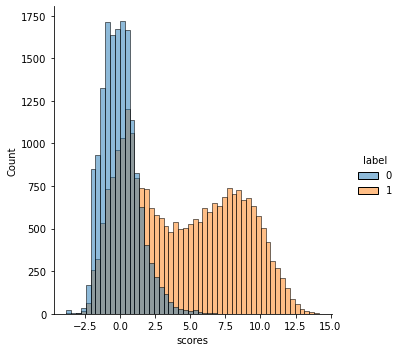

In [138]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [139]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [140]:
function_check

,label,scores,type
0,-6.199338,2.808509e-37,Target
1,-6.186926,5.985421e-37,Target
2,-6.174515,1.270695e-36,Target
3,-6.162104,2.687295e-36,Target
4,-6.149693,5.661311e-36,Target
...,...,...,...
995,6.149693,9.901908e-10,Target
996,6.162104,7.359032e-10,Target
997,6.174515,5.448163e-10,Target
998,6.186926,4.017973e-10,Target


In [141]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

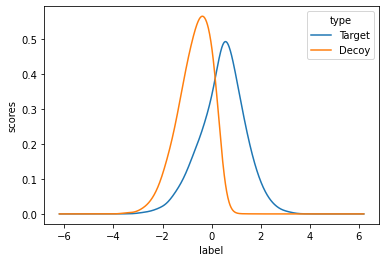

In [142]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [143]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00081271, 0.        , 0.00400622, ..., 0.00037709, 0.00748945,
       0.00648644])

In [76]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00090972, 0.        , 0.00260083, ..., 0.00375804, 0.00853121,
       0.00938467])